In [1]:
import numpy as np
import scipy.stats as sps
from scipy.integrate import quad
%pylab inline


Populating the interactive namespace from numpy and matplotlib


Задача 5.1
=========

Построим график плотности случайного вектора. $\xi = (\xi_1, \xi_2) \sim N(a, \Sigma)$,
где $a = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$
и $\Sigma = \begin{pmatrix} 10 & 8 \\ 8 & 10 \end{pmatrix}$


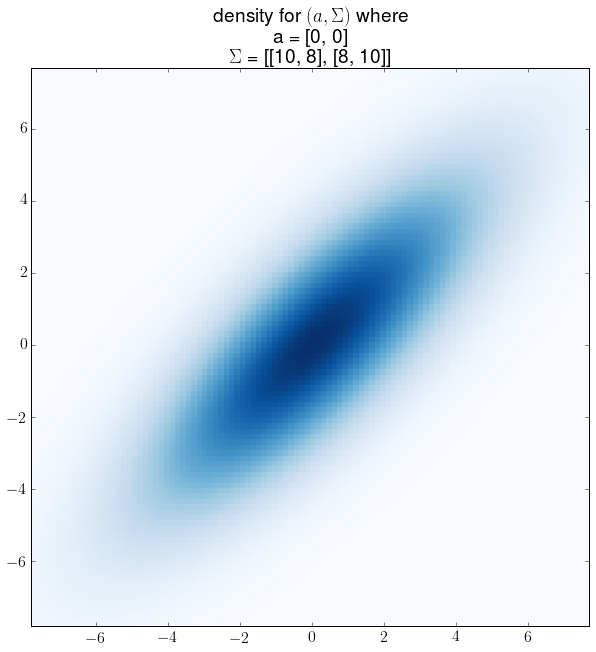

In [2]:
def draw_density(a, sigma, figsz=10):
    
    # План простой.
    # 1. Определить сетку, на которой считаем значения.
    # 2. Получить распределение.
    # 3. Настроить график, чтобы было красиво.
    # 4. Вызвать отрисовку графика по созданной сетке.
    
    # Понятны все этапы, кроме создания сетки, потому что
    # в создании сетки используются неочевидные встроенные функции.
    # Их я поясню. В основном, чтобы самой не забыть.
    
    # Краткий экскурс: какой результат возвращает 
    #     mgrid[start1:end1:step1, start2:end2:step2]?
    # Обозначим как v1 вектор значений от start1 (включая) до end1 (не включая), с шагом step1
    # Обозначим как v2 вектор значений от start2 (включая) до end2 (не включая), с шагом step2
    # mgrid генерирует 2 массива размерности (len(v1), len(v2)) каждый
    # у первого массива столбцы равны вектору v1
    # у второго массива строки равны вектору v2
    
    # Краткий экскурс: np.empty и shape
    #   Размерность массива выражается кортежем (x1, x2, ..., xn),
    #   в котором x1 — это самая «наружняя» размерность, а xn — самая внутренняя.
    #   np.empty создаёт массив нужного размера, заполненный мусором (а не нулями).
    #   Из-за отсутствия обнуления он может работать быстрее, но несколько смущать.
    
    # Краткий экскурс: ndarray slicing
    #     У ndarray можно брать срезы по любому измерению.
    #     Двоеточие забирает все элементы по соответствующей размерности.
    # Пример:
    # >>> x = np.array([[1, 2], [3, 4], [5, 6]])
    # >>> y = x[:, 1]
    # >>> print(y)
    # [2 4 6]
    
    # 1.
    
    # xx — все координаты по x,
    # yy — все координаты по y.
    xx, yy = np.mgrid[-8:8:0.15, -8:8:0.15]
    
    # grid — пары координат [x, y], поэтому добавляем размерность
    grid = np.empty(xx.shape + (2,))
    
    # заполняем значения координат по x и y
    grid[:, :, 0] = xx
    grid[:, :, 1] = yy
    
    # 2.
    distr = sps.multivariate_normal(a, sigma)
    
    # 3.
    plt.rc('text', usetex=True)
    plt.rc('font', size=16)
    plt.figure(figsize=(figsz, figsz))
    plt.axes().set_aspect('equal')
    plt.xlim((np.min(xx) + 0.2, np.max(xx) - 0.2))
    plt.ylim((np.min(yy) + 0.2, np.max(yy) - 0.2))
    plt.title(r'density for $(a, \Sigma)$ where ' +
              '\na = ' + str(a) + '\n' + r'$\Sigma$ = ' + str(sigma))

    # 4.
    plt.pcolormesh(xx, yy, distr.pdf(grid), cmap="Blues")
    plt.show()
    
draw_density([0,0], [[10, 8], [8, 10]])

Просто по графику совместной плотности сложно сделать какой-либо вывод. Поэтому посмотрим ещё и на то, как выглядят графики плотности для нормального случайного вектора с другими параметрами и сделаем вывод о том, как параметры влияют на график.

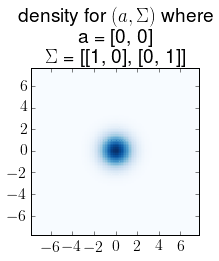

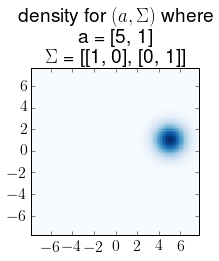

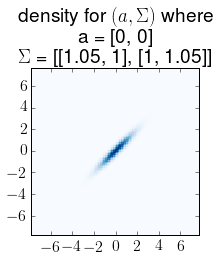

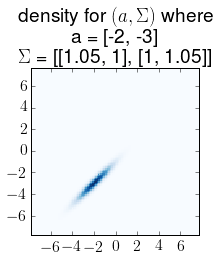

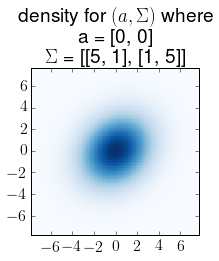

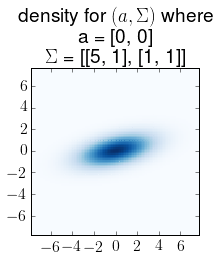

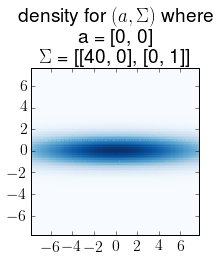

In [3]:
draw_density([0,0], [[1, 0], [0, 1]], 3)
draw_density([5,1], [[1, 0], [0, 1]], 3)
draw_density([0,0], [[1.05, 1], [1, 1.05]], 3)
draw_density([-2,-3], [[1.05, 1], [1, 1.05]], 3)
draw_density([0,0], [[5, 1], [1, 5]], 3)
draw_density([0,0], [[5, 1], [1, 1]], 3)
draw_density([0,0], [[40, 0], [0, 1]], 3)


Вектор математических ожиданий определяет сдвиг фигуры. Чем больше дисперсия компоненты вектора, тем шире тёмная часть фигуры по соответветствующей координате. Чем больше ковариация, тем заметнее вытянутость вдоль линии y = x. Можно сделать вывод о том, что параметры распределения достаточно наглядно воздействуют на график плотности (в частности, это можно наблюдать и на графике для вектора из условия) и их воздействия хорошо соотносятся с тем, за что, как мы считаем, они отвечают: математическое ожидание — за «среднюю точку», дисперсия — за разброс, ковариация — за коррелированность.

Ищем условную плотность. Обозначим совместную плотность через $f_{(\xi_1, \xi_2)}(x, y)$, а маргинальную плотность — через $f_{\xi_2}(y)$.
$$f_{\xi_2}(y) = \int_{-\inf}^{inf}f_{(\xi_1, \xi_2)}(x, y)dx$$

$$f_{\xi_1 | \xi_2}(x | y) = \frac{f_{(\xi_1, \xi_2)}(x, y)}{f_{\xi_2}(y)} \mathbb{~~при~~} f_{\xi_2}(y) > 0,$$ 
$$f_{\xi_1 | \xi_2}(x | y) = 0 \mathbb{~~при~~} f_{\xi_2}(y) = 0.$$ 

In [4]:
# Кажется, что много кода, но на самом деле тут всё просто

class MarginalDensity:
    
    # Маргинальное распределение хранит в себе своё нормальное распределение
    # Именно его параметры и передаются в конструктор класса
    def __init__(self, a, sigma):
        self.distr = sps.multivariate_normal(a, sigma)
        self.precalc = dict()
        
    # Подсчёт в одно строчку: просто берём интеграл из теоретической формулы.
    # Плюс добавлено кеширование значений, потому что незачем 4-ре раза
    # считать одно и то же, когда строим графики плотностей.
    # quad — это функция, которая считает интеграл 
    # и возвращает результат и погрешность.
    # Погрешность выкидывается.
    def calc(self, y):
        if y not in self.precalc:
            f = lambda x: self.distr.pdf([x, y])
            self.precalc[y] = quad(f, -np.inf, np.inf)[0]
        return self.precalc[y]
    
class ConditionalDensity:
    
    # Условная плотность тоже хранит в себе своё распределение
    def __init__(self, a, sigma):
        self.marginal = MarginalDensity(a, sigma)
        self.distr = self.marginal.distr
        
    #Подсчёт простой, тоже из теоретической формулы
    def calc(self, x, y):
        if self.marginal.calc(y) == 0:
            return 0;
        return self.distr.pdf([x, y]) / self.marginal.calc(y)

Строим графики условных плотностей.

In [17]:
def draw_conditional_density(y_list, a, sigma):
    p = ConditionalDensity(a, sigma);
    grid = np.linspace(-10, 10, num=1000)
    plt.figure(figsize=(12, 5))
    for y in y_list:
        values = [p.calc(x, y) for x in grid]
        plt.plot(grid, values, label="y = " + str(y))
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

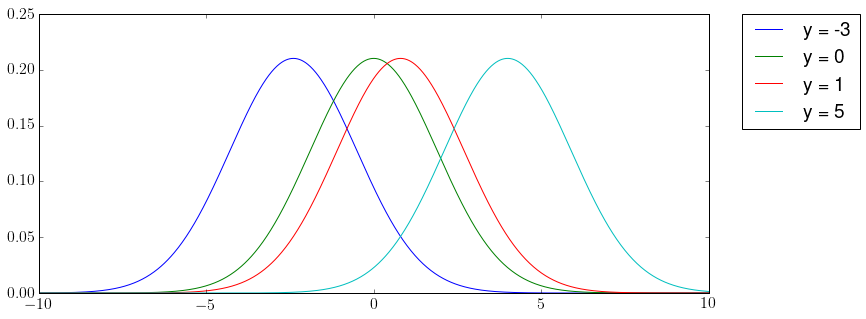

In [18]:
draw_conditional_density([-3, 0, 1, 5], [0, 0], [[10, 8], [8, 10]])

Видим, что купол при $y = 0$ находится прямо над 0, при $y = 1$ и $y = -3$ — почти над этими значениями. При $y = 5$ хорошо заметно, что центр купола не ровно над $5$, а смещён к нулю.

Это нам наглядно и показывает коррелированность $\xi_1$ и $\xi_2$. Если бы их ковариация была ещё больше, а матожидания по прежнему одинаковыми, то центры куполов совпадали бы со значениями y ещё точнее, а если бы они были бы независимыми, то купол бы не смещался бы. Он бы был над математическим ожиданием $\xi_2$ при любых значениях $y$.

Проиллюстрируем выводы графиками, выполненными для новых значений ковариаций.

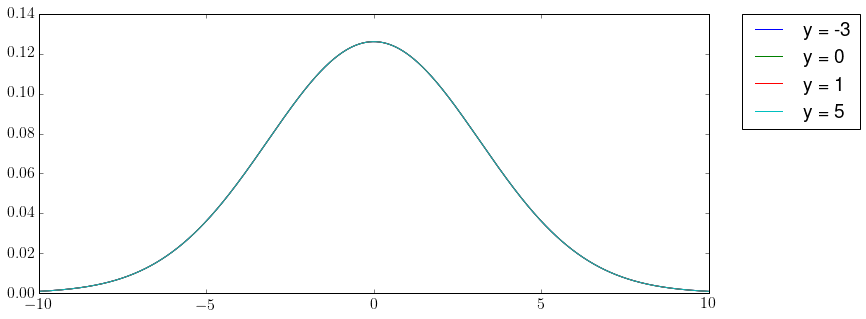

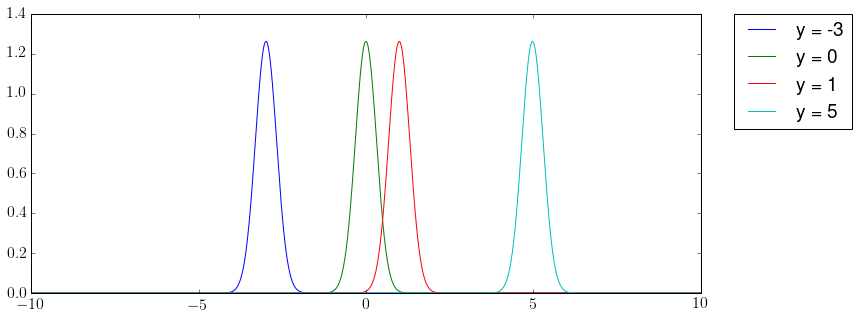

In [19]:
draw_conditional_density([-3, 0, 1, 5], [0, 0], [[10, 0], [0, 10]])
draw_conditional_density([-3, 0, 1, 5], [0, 0], [[10, 9.95], [9.95, 10]])

In [7]:
class ConditionalEstimate:
    def __init__(self, a, sigma):
        self.p = ConditionalDensity(a, sigma)
        
    def calc(self, y):
        return quad(lambda x: x * self.p.calc(x, y), -np.inf, np.inf)[0]


def draw_estimate(a, sigma):
    estimate = ConditionalEstimate(a, sigma)
    grid = np.linspace(-10, 10, num=100)
    values = [estimate.calc(y) for y in grid]
    plt.rc('text', usetex=True)
    
    plt.plot(grid, values, label = r"$E(\xi_1|\xi_2 = y)$")
    plt.plot([-10, 10], [a[0], a[0]], label=r"$E\xi_1$")
    
    plt.xlim(-8, 8)
    plt.ylim(-8, 8)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

Строим график условного математического ожидания.

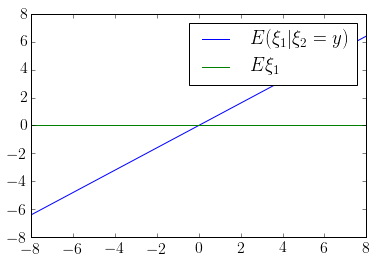

In [8]:
draw_estimate([0, 0], [[10, 8],[8, 10]])


Видно, что условное математическое ожидание по значению сдвинуто в сторону $y$. Это и неудивительно, если вспомнить график условных плотностей. Если бы величины были независимыми, то график условного мат. ожидания совпадал бы с графиком обычного. Проиллюстрируем этот вывод графиком для некоррелированных (а значит, в силу их свойств, независимых) нормальных величин.

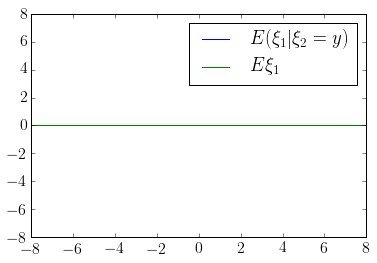

In [20]:
draw_estimate([0, 0], [[10, 0],[0, 10]]) #линии совпали, разницы не видно